# **K-Means Clustering**

`Goal:`Partition data into $K$ distinct clusters, where each data point belongs to the cluster with the nearest mean (centroid).


**Mathematical Idea/Algorithm:**

1. **Initilize:** Randomly choose $K$ centroids (cluster center) from the data points.

2. **Assign:** Assign each data point to the nearest centroid (based on Euclidean distance).

3. **update:** Recalculate the centroid as the mean of all data points assigned to that cluster.

4. **Repeat:** Steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.


**Euclidean Distance Formula in 2D (between two points):**

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

**General n-dimensional Euclidean Distance:**
$$
d = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

**K-Means with `scikit-learn`**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # For generating clusting data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# 1. generate Sample data for clustering
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

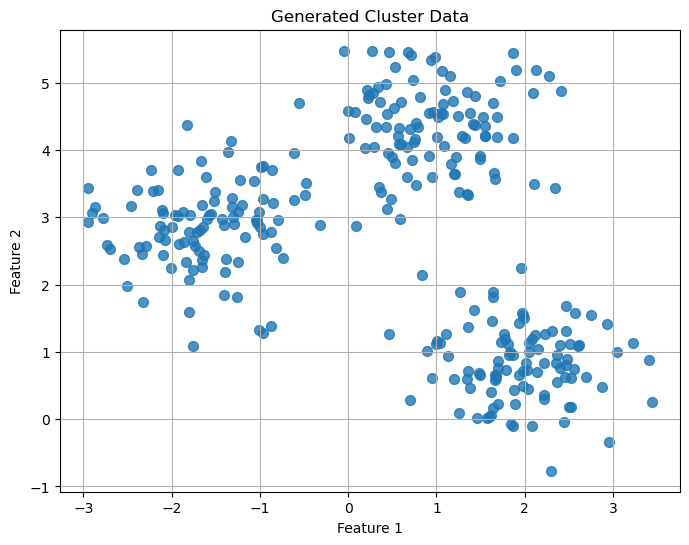

In [5]:
# 2. here just for visualization to see the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title('Generated Cluster Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [6]:
# Scale the data (important for distance-based algorithms like K-Means)
scaler_kmeans = StandardScaler()
X_scaled_kmeans = scaler_kmeans.fit_transform(X)

In [7]:
# Initialize and train K-Means Model
# n_init='auto' handles multiple initializations and picks the best one
kmeans_sklearn = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans_sklearn.fit(X_scaled_kmeans)

KMeans(n_clusters=3, random_state=0)

In [8]:
# Get cluster labels
cluster_labels_sklearn = kmeans_sklearn.labels_
centroids_sklearn = kmeans_sklearn.cluster_centers_

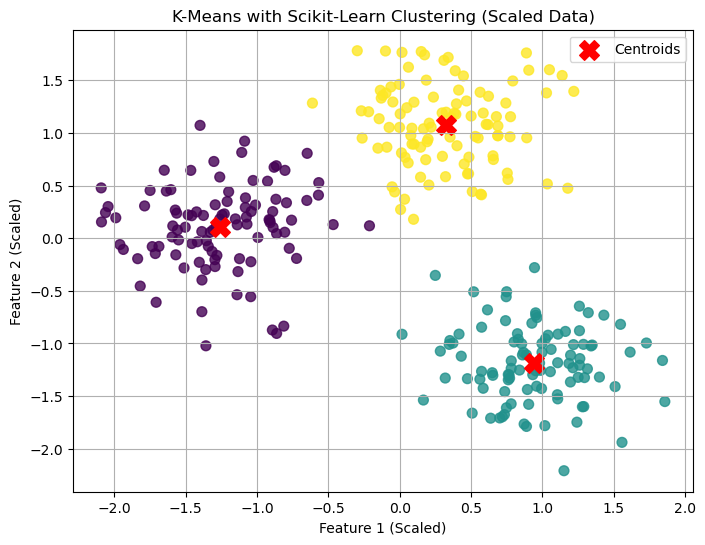

In [9]:
# plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_kmeans[:, 0], X_scaled_kmeans[:, 1], c=cluster_labels_sklearn, s=50, cmap='viridis', alpha=0.8)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], s=200, marker='X', color='red', label='Centroids')
plt.title('K-Means with Scikit-Learn Clustering (Scaled Data)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Note: For unsupervised learning, there's no "ground truth" y to evaluate against in the same way as supervised.
# We often use internal metrics like Silhouette Score or visual inspection.
# Or, if we do have labels (like y_true in this generated data), we can use adjusted_rand_score, etc.
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, cluster_labels_sklearn)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')

Adjusted Rand Index (ARI): 1.0000
